In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline

In [57]:
input_data = np.load("Input_data.npy")
label_data = np.load("Output_data.npy")

print('Input shape: ', input_data.shape)
print('Label shape: ', label_data.shape)

Input shape:  (18545, 64, 64, 12)
Label shape:  (18545, 64, 64, 1)


## Data Visualization

### All variables in one subplot

In [58]:
random_number = np.random.randint(0, input_data.shape[0]-1)
random_number

10884

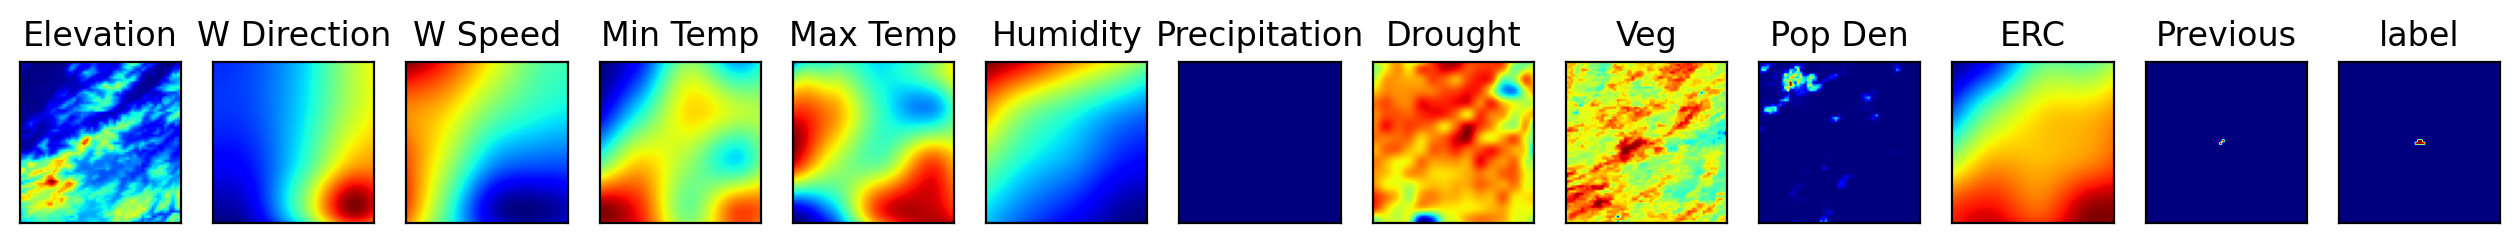

In [59]:
name_list = ['Elevation', 'W Direction', 'W Speed', 'Min Temp',
            'Max Temp', 'Humidity', 'Precipitation', 'Drought',
            'Veg', 'Pop Den', 'ERC', 'Previous']

plt.figure(figsize=(16,4), dpi=200)

for i in range(12):
    plt.subplot(1, 13, i+1)
    plt.imshow(input_data[random_number, :, :, i], cmap='jet')
    plt.xticks([])
    plt.yticks([])
    plt.title(name_list[i])
    
    if i==11:
        plt.subplot(1,13,13)
        plt.imshow(label_data[random_number, :, :, 0], cmap='jet')
        plt.xticks([])
        plt.yticks([])
        plt.title('label')
        
plt.show()

### Variable Visualization

In [60]:
random_number = np.random.randint(0, input_data.shape[0]-1)
random_number

12384

In [61]:
band_number = np.random.randint(0, input_data.shape[3]-1)
band_number

0

Text(0.5, 1.0, 'Elevation')

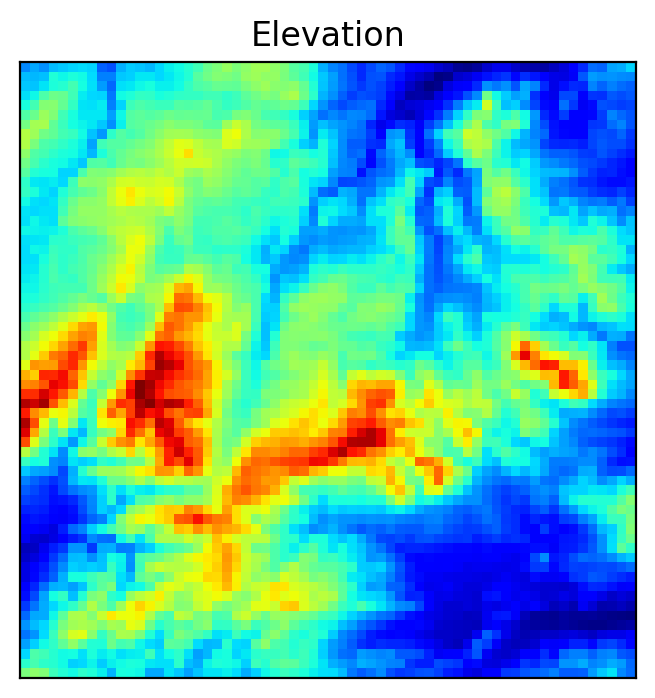

In [62]:
name_list = ['Elevation', 'W Direction', 'W Speed', 'Min Temp',
            'Max Temp', 'Humidity', 'Precipitation', 'Drought',
            'Veg', 'Pop Den', 'ERC', 'Previous']

plt.figure(figsize=(16,4), dpi=200)
plt.imshow(input_data[random_number, :, :, band_number], cmap='jet')
plt.xticks([])
plt.yticks([])
plt.title(name_list[band_number])

## Data Preprocessing

### Remove pixels with uncertainty

In [63]:
np.sum(input_data[0,:,:,11]==-1)

12

In [64]:
sample_index = []

for i in range(input_data.shape[0]):
    if np.sum(input_data[i,:,:,11]==-1)>0 or np.sum(label_data[i,:,:,0]==-1)>0:
        pass
    else:
        sample_index.append(i)

In [65]:
len(sample_index)

10303

In [66]:
n_samples = len(sample_index)
width = input_data.shape[1]
height = input_data.shape[2]
n_var = input_data.shape[3]

x_input = np.zeros((n_samples, width, height, n_var), dtype='float32')
y = np.zeros((n_samples, width, height, 1), dtype='float32')

In [67]:
for i in range(len(sample_index)):
    x_input[i] = input_data[sample_index[i]]
    y[i] = label_data[sample_index[i]]

In [68]:
del input_data
del label_data

In [69]:
x_input.shape

(10303, 64, 64, 12)

In [70]:
y.shape

(10303, 64, 64, 1)

### Update Labels

In [71]:
labels = np.zeros((y.shape[0],1), dtype='float32')

for i in range(labels.shape[0]):
    if np.sum(y[i,:,:,0]) > np.sum(x_input[i,:,:,11]):
        labels[i,0]=1

In [72]:
print('Number of 1s: ', np.sum(labels==1))
print('Number of 0s: ', np.sum(labels==0))

Number of 1s:  6303
Number of 0s:  4000


### Balance Dataset

In [73]:
# Wen need to balance data so the model can be ready for both 0 and 1
Min_samples = np.min([np.sum(labels==1), np.sum(labels==0)])
Min_samples

4000

In [74]:
Data = np.zeros((Min_samples*2, x_input.shape[1], x_input.shape[2], x_input.shape[3]), dtype='float32')

c = 0
for i in range(x_input.shape[0]):
    if labels[i,0] == 0:
        Data[c] = x_input[i]
        c = c + 1

In [75]:
c

4000

In [76]:
New_labels = np.zeros((Min_samples*2, 1), dtype='float32')
New_labels[Min_samples:] = 1

In [77]:
Ones_index = []

for i in range(x_input.shape[0]):
    if labels[i,0] == 1:
        Ones_index.append(i)
        
Ones_index

[0,
 3,
 4,
 5,
 6,
 7,
 10,
 11,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 38,
 41,
 42,
 43,
 44,
 47,
 48,
 49,
 50,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 121,
 122,
 127,
 130,
 132,
 133,
 134,
 135,
 137,
 139,
 140,
 141,
 142,
 143,
 145,
 147,
 150,
 151,
 152,
 158,
 162,
 163,
 164,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 176,
 177,
 180,
 181,
 185,
 187,
 188,
 193,
 196,
 197,
 200,
 204,
 206,
 209,
 210,
 212,
 219,
 220,
 222,
 223,
 227,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 250,
 251,
 252,
 254,
 258,
 259,
 260,
 262,
 263,
 264,
 265,
 266,
 267,
 272,
 273,
 277,
 278,
 280,
 281,
 282,
 283,
 284,
 285,
 28

In [78]:
len(Ones_index)

6303

In [79]:
random.shuffle(Ones_index)
Ones_index

[8962,
 3941,
 4175,
 3182,
 5932,
 1130,
 67,
 8464,
 4491,
 8224,
 2193,
 6825,
 4660,
 7806,
 2194,
 3862,
 4112,
 9356,
 7626,
 1249,
 4692,
 3648,
 1645,
 6771,
 8383,
 4801,
 3555,
 4164,
 527,
 3773,
 2856,
 1510,
 5115,
 9396,
 1533,
 3728,
 2722,
 8458,
 2138,
 6372,
 3192,
 4219,
 478,
 9877,
 4986,
 5836,
 520,
 8625,
 3151,
 8978,
 7763,
 5699,
 6106,
 4107,
 3991,
 2212,
 3237,
 5968,
 1172,
 9660,
 9786,
 9952,
 8623,
 7237,
 6210,
 3426,
 3038,
 9835,
 1050,
 1614,
 4757,
 3125,
 4435,
 5691,
 4271,
 4677,
 579,
 2751,
 8117,
 4323,
 6730,
 7542,
 4711,
 9389,
 9333,
 2617,
 3726,
 4753,
 254,
 1836,
 949,
 9056,
 3683,
 6265,
 6487,
 9666,
 1404,
 8768,
 2268,
 9610,
 10020,
 3115,
 3790,
 2531,
 5398,
 7251,
 448,
 7729,
 1331,
 7705,
 4249,
 2516,
 2743,
 6895,
 2744,
 1608,
 3112,
 5270,
 4589,
 10275,
 3430,
 7696,
 3517,
 8278,
 1862,
 5222,
 6948,
 1451,
 8856,
 3685,
 5322,
 6183,
 6642,
 1088,
 296,
 5959,
 4670,
 4038,
 5227,
 3340,
 6091,
 7032,
 9378,
 6436,


In [80]:
Ones_index = Ones_index[0:4000]
len(Ones_index)

4000

In [81]:
x_input[Ones_index].shape

(4000, 64, 64, 12)

In [82]:
Data[4000:] = x_input[Ones_index]

In [83]:
Data.shape

(8000, 64, 64, 12)

### Shuffle Data

In [84]:
indexes = np.arange(Data.shape[0])
indexes

np.random.shuffle(indexes)
indexes

array([ 204, 3226, 3039, ..., 3343, 4566,  791])

In [85]:
input_data = Data[indexes]
label_data = New_labels[indexes]

label_data[20:30]

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [86]:
input_data.shape, label_data.shape

((8000, 64, 64, 12), (8000, 1))

## Feature Engineering

In [87]:
list_ = []
for i in range(12): 
    
    if i == 11:
        Sum = np.sum(input_data[:,:,:,i], axis=(1,2))
        list_.append(Sum)
        print(i, len(list_))
        
    else:
        Mean = np.mean(input_data[:,:,:,i], axis=(1,2))
        list_.append(Mean)
        Min = np.min(input_data[:,:,:,i], axis=(1,2))
        list_.append(Min)
        Std = np.std(input_data[:,:,:,i], axis=(1,2))
        list_.append(Std)
        Max = np.max(input_data[:,:,:,i], axis=(1,2))
        list_.append(Max)
        
        print(i, len(list_))

0 4
1 8
2 12
3 16
4 20
5 24
6 28
7 32
8 36
9 40
10 44
11 45


In [88]:
len(list_)

45

In [89]:
N_features = len(list_)

data = np.zeros((8000, N_features))

for i in range(N_features):
    data[:,i] = list_[i]

In [90]:
data.shape

(8000, 45)

In [105]:
Mean_list=[]
Std_list=[]

for i in range(data.shape[1]):
    
    Mean=np.mean(data[:,i])
    Mean_list.append(Mean)

    Std=np.std(Data[:,i])
    Std_list.append(Std)

In [106]:
Normalized_Data=np.zeros_like(data)
for i in range(data.shape[1]):

    Normalized_Data[:,i]=(data[:,i]-Mean_list[i])/Std_list[i]

In [107]:
indexes = np.arange(Normalized_Data.shape[0])

np.random.shuffle(indexes)
train_index = indexes[0: int(0.9 * Normalized_Data.shape[0])]
test_index = indexes[int(0.9 * Normalized_Data.shape[0]):]

x_train = Normalized_Data[train_index]
x_test = Normalized_Data[test_index]

y_train = label_data[train_index]
y_test = label_data[test_index]

In [108]:
Normalized_Data.shape, data.shape

((8000, 45), (8000, 45))

In [109]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [110]:
x_train.shape

(7200, 45)

In [111]:
# clf = tree.DecisionTreeClassifier()
# clf.fit(x_train, y_train)

clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0)
clf.fit(x_train, y_train)

# clf = LogisticRegression(random_state=0)
# clf.fit(x_train, y_train)

C:\Users\amirr\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.74875

## PCA

In [114]:
Input_data = Data[indexes]
label_data = New_labels[indexes]

Input_data.shape,label_data.shape

((8000, 64, 64, 12), (8000, 1))

In [115]:
n_samples=Input_data.shape[0]
time_step=Input_data.shape[1]
width=Input_data.shape[2]
height=Input_data.shape[3]

n_features=time_step*width*height

X=np.zeros((n_samples,n_features),dtype='float32')


output_element=width*height
Y=np.zeros((n_samples,1),dtype='float32')

for i in range(n_samples):
    
    X[i]=Input_data[i].flatten()
    Y[i]=label_data[i]
    

In [116]:
X.shape, Y.shape

((8000, 49152), (8000, 1))

In [117]:
import numpy as np
from sklearn.decomposition import PCA


# Initialize PCA with the desired number of components (12 in this case)
pca = PCA(n_components=40)

# Fit the PCA model to the data
pca.fit(X)

# Get the explained variance ratio, which indicates the importance of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

In [118]:
X_pca = pca.fit_transform(X)

In [119]:
X_pca.shape

(8000, 40)

In [120]:
explained_variance_ratio

array([0.25760666, 0.24492103, 0.11660986, 0.11423679, 0.04731867,
       0.02901731, 0.02184551, 0.01559782, 0.00889181, 0.00803938,
       0.00671451, 0.0058986 , 0.00523375, 0.00464185, 0.00414508,
       0.00375575, 0.00292238, 0.00277073, 0.00248924, 0.00213886,
       0.00185842, 0.00161869, 0.00159588, 0.00150906, 0.00135632,
       0.00129765, 0.00122953, 0.00118588, 0.00114055, 0.00110784,
       0.00105323, 0.00096709, 0.00091877, 0.00086757, 0.00082239,
       0.0008071 , 0.00077231, 0.00073159, 0.00071447, 0.00067037],
      dtype=float32)

In [121]:
indexes = np.arange(X_pca.shape[0])

np.random.shuffle(indexes)
train_index = indexes[0: int(0.9 * X_pca.shape[0])]
test_index = indexes[int(0.9 * X_pca.shape[0]):]

x_train = X_pca[train_index]
x_test = X_pca[test_index]

y_train = Y[train_index]
y_test = Y[test_index]

In [122]:
print('X Train shape: ',x_train.shape)
print('Y Train shape: ',y_train.shape)
print('X Test shape: ',x_test.shape)
print('Y Test shape: ',y_test.shape)

X Train shape:  (7200, 40)
Y Train shape:  (7200, 1)
X Test shape:  (800, 40)
Y Test shape:  (800, 1)


### Training

In [123]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [124]:
# clf = tree.DecisionTreeClassifier()
# clf.fit(x_train, y_train)


clf = RandomForestClassifier(n_estimators=200,max_depth=10, random_state=0)
clf.fit(x_train, y_train)

# clf = LogisticRegression(random_state=0)
# clf.fit(x_train, y_train)

C:\Users\amirr\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [125]:
y_pred=clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6275